<ipython-input-1-487455739184>:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("H").sum()  # Resample to hourly frequency


MAE: 10174.29


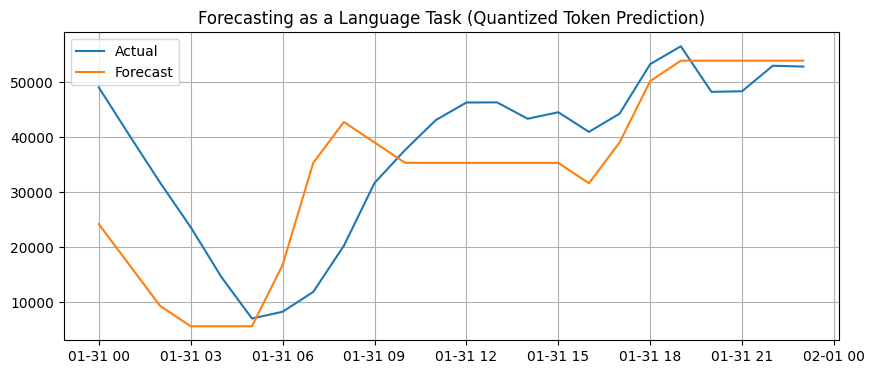

In [1]:
# Forecasting as a Language Task - Google Colab Notebook

# Step 1: Install necessary packages
!pip install -q numpy pandas matplotlib scikit-learn

# Step 2: Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error

# Step 3: Load and preprocess a time series dataset
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv"
df = pd.read_csv(url, parse_dates=["timestamp"], index_col="timestamp")
df = df.resample("H").sum()  # Resample to hourly frequency
series = df["value"].dropna()

# Step 4: Split into train and test
horizon = 24
train = series[:-horizon]
test = series[-horizon:]

# Step 5: Quantize the time series
n_bins = 20
quantizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
train_values = train.values.reshape(-1, 1)
quantizer.fit(train_values)
train_tokens = quantizer.transform(train_values).astype(int).flatten()

# Step 6: Language modeling approach - naive next token prediction
# We'll use the last window to predict next tokens
input_tokens = train_tokens[-horizon:]
predicted_tokens = input_tokens.copy()  # for illustration, copy last tokens

# Step 7: Dequantize tokens to reconstruct values
forecast = quantizer.inverse_transform(predicted_tokens.reshape(-1, 1)).flatten()

# Step 8: Evaluate and visualize
mae = mean_absolute_error(test, forecast)
print(f"MAE: {mae:.2f}")

plt.figure(figsize=(10, 4))
plt.plot(test.index, test.values, label="Actual")
plt.plot(test.index, forecast, label="Forecast")
plt.title("Forecasting as a Language Task (Quantized Token Prediction)")
plt.legend()
plt.grid(True)
plt.show()
